In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r'C:\Users\David\Desktop\datadriven\pump\data\data_train.csv')#The independent variables for the training set
ydf=pd.read_csv(r'C:\Users\David\Desktop\datadriven\pump\data\labels.csv')#The dependent variable (status_group) for each of the rows in Training set values
test_var_df=pd.read_csv(r'C:\Users\David\Desktop\datadriven\pump\data\test_set.csv')#The independent variables that need predictions
submission=pd.read_csv(r'C:\Users\David\Desktop\datadriven\pump\data\SubmissionFormat.csv')#The format for submitting your predictions

In [23]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [24]:
ydf.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [25]:
test_var_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [26]:
submission.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [27]:
data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
#dataset=pd.merge(ydf,data, on='id')

In [9]:
#dataset.head()

In [10]:
#pumps=dataset.groupby('status_group')

In [11]:
#pumps.groups

In [12]:
#work=pumps.get_group('functional')
#broke=pumps.get_group('non functional')
#repair=pumps.get_group('functional needs repair')

In [13]:
#print('number of working pumps is ', len(work))
#print('number of broken pumps is ', len(broke))
#print('number of pumps needing repair is ', len(repair))

In [14]:
#labelencode status_group
#ydf['status_group'].replace('non functional',float(0),inplace=True)
#ydf['status_group'].replace('functional',float(1),inplace=True)


In [15]:
#ydf

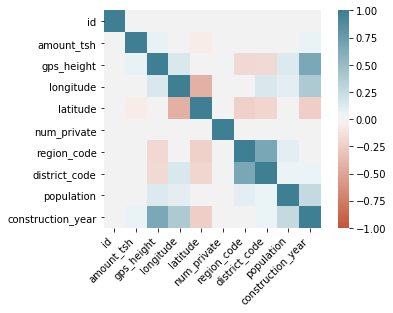

In [16]:


corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
len(data)

59400

In [18]:
len(test_var_df)

14850

In [19]:
dataset=pd.concat([data,test_var_df])


In [20]:
dataset.shape

(74250, 40)

In [21]:
dataset=pd.get_dummies(dataset)

In [28]:
dataset.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,1,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
dataset.shape

(74250, 77302)

In [30]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [31]:
X = dataset.iloc[0:59400] # Features

In [32]:
X1=dataset.iloc[59400:] 

In [33]:
X.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,1,0,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,0,0,0,0,0,1,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
X.shape

(59400, 77302)

In [35]:
X1.shape

(14850, 77302)

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(ydf['status_group'])

LabelEncoder()

In [37]:
le.classes_

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [38]:
y=le.transform(ydf['status_group'])

In [39]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print(x)

In [41]:
unique(y)

0
1
2


In [42]:
X=X[0:30000]

In [43]:
y=y[0:30000]

In [44]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [45]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [46]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [185]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [186]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.756


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(dataset),class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('pumps.png')
Image(graph.create_png())

In [187]:
y_predicted = clf.predict(X1)

In [188]:
y_predicted

array([0, 0, 0, ..., 0, 0, 2])

In [189]:
submission['code']=y_predicted

In [193]:
submission.head()

,id,status_group,code
0,50785,predicted label,0
1,51630,predicted label,0
2,17168,predicted label,0
3,45559,predicted label,2
4,49871,predicted label,0


In [194]:
predict=[]
for i in y_predicted:
    if i==0:
        a='functional'
    if i==1:
         a='functional needs repair'
    if i==2:
        a='non functional'
    predict.append(a)
        
    

In [195]:
submission['code2']=predict

In [196]:
submission

,id,status_group,code,code2
0,50785,predicted label,0,functional
1,51630,predicted label,0,functional
2,17168,predicted label,0,functional
3,45559,predicted label,2,non functional
4,49871,predicted label,0,functional
...,...,...,...,...
14845,39307,predicted label,2,non functional
14846,18990,predicted label,0,functional
14847,28749,predicted label,0,functional
14848,33492,predicted label,0,functional


In [198]:
status_group=submission[['id','code2']]

In [200]:
status_group=submission.rename(columns = {'code2':'status_group'}, inplace = True)

In [201]:
submission

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [204]:
submission.to_csv(r'C:\Users\David\Desktop\datadriven\pump\data\pumps_submission1.csv')

In [ ]:
# create map using BASEMAP
from mpl_toolkits.basemap import Basemap

lat = data['latitude'].values
long = data['longitude'].values


# determine range to print based on min, max lat and long of the data
#margin = .2 # buffer to add to the range
#lat_min = min(lat) - margin
#lat_max = max(lat) + margin
#long_min = min(long) - margin
#long_max = max(long) + margin

lat_min = -30
lat_max = 50
long_min = -20
long_max =50
plt.figure(figsize=(30,15))
# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            #lat_0=(lat_max - lat_min)/2,
            #lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and long to map projection coordinates
lons, lats = m(long, lat)
# plot points as red dots

m.scatter(lons, lats, marker = 'o', color='r', zorder=10)
plt.show()

In [ ]:
# create map using BASEMAP
from mpl_toolkits.basemap import Basemap

lat = work['latitude'].values
long = work['longitude'].values

lat1 = broke['latitude'].values
long1 = broke['longitude'].values

lat2 = repair['latitude'].values
long2 = repair['longitude'].values


# determine range to print based on min, max lat and long of the data
#margin = .2 # buffer to add to the range
#lat_min = min(lat) - margin
#lat_max = max(lat) + margin
#long_min = min(long) - margin
#long_max = max(long) + margin

lat_min = -15
lat_max = 0
long_min = 25
long_max =40
plt.figure(figsize=(60,60))
# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            #lat_0=(lat_max - lat_min)/2,
            #lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and long to map projection coordinates
lons, lats = m(long, lat)
lons1, lats1 = m(long1, lat1)
lons2, lats2 = m(long2, lat2)
# plot points as red dots

m.scatter(lons, lats, marker = 'o', color='r', label='working pump',zorder=12)
m.scatter(lons1, lats1, marker = 'o', color='b', label='broken pump',zorder=11)
m.scatter(lons2, lats2, marker = 'o', color='y',label='pump needs repair', zorder=10)
plt.legend()
plt.show()